# Regresión Logística

Tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica en función de las variables independientes o predictoras.

Se usa en problemas de clasificación.

https://www.youtube.com/watch?v=yIYKR4sgzI8&t=265s&ab_channel=StatQuestwithJoshStarmer

https://www.youtube.com/watch?v=vN5cNN2-HWE&ab_channel=StatQuestwithJoshStarmer

https://www.youtube.com/watch?v=BfKanl1aSG0&ab_channel=StatQuestwithJoshStarmer

https://medium.com/@csarchiquerodriguez/modelo-de-regresi%C3%B3n-log%C3%ADstica-a17ffe204ade

## Clasificación binaria

![](https://upload.wikimedia.org/wikipedia/commons/6/6d/Exam_pass_logistic_curve.jpeg)

### Funcion sigmoide

$$ y = \frac{1}{1+e^{-X}} $$

En la clasificación binaria el resultado es 1 o 0.

Tengo un conjunto de atributos (variables predictoras)

$$ \{x_1, x_2, ... , x_n\} $$

$$ X = b_1 x_1 + b_2 x_2 + ... + b_n x_n $$

esta vaiable que tiene en cuenta los pesos es la que se pasa a la función sigmoide.

### MLE

para este ejemplo se usa el modelo

$$ p = \hat{y} = \frac{1}{1+e^{-X}} $$

Se aplica Bernoulli. la probabilidad promedio de Bernoulli es

$$ \bar{p} = p \cdot 1 + (1-p) \cdot 0 $$

a partir de aquí se puede definir una verosimilitud de *uno* de los puntos de mi dataset

$$ L_i = \hat{y_i} \cdot y_i + (1 - \hat{y_i}) \cdot (1-y_i) $$

ahora se usa el logaritmo y se suman todos los puntos para obtener una verosimilitud total

$$ L = \sum_i (y_i \cdot ln(\hat{y_i}) + (1-y_i) \cdot ln(1 - \hat{y_i}) ) $$

ahora lo que queremos es maximizar esa verosimilitud, pero...

$$ max(L) = min(-L) $$

esa -L es la función que se busca optimizar (función de costo) en un problema de clasificación binario y se llama (Cross-Entrop)

$$ CE = - \sum_i (y_i \cdot ln(\hat{y_i}) + (1-y_i) \cdot ln(1 - \hat{y_i}) ) $$

esta verosimilitud da los valores de probabilidad más altos cuando la predicción de la sigmoide coincide con las clases del conjunto de datos, es decir, cuando 

$$ \hat{y} \approx y  $$

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# máxima verosimilitud para un punto
def likelihood(y, yp):
  return yp*y+(1-yp)*(1-y)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


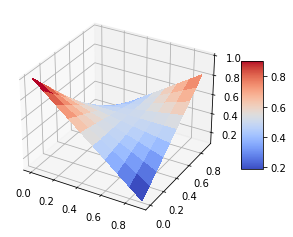

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

Y = np.arange(0, 1, 0.1)
YP = np.arange(0, 1, 0.1)
Y, YP = np.meshgrid(Y, YP)
Z = likelihood(Y, YP)

surf = ax.plot_surface(Y, YP, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# esto confirma lo de que la verosimilitud es alta
# cuando "y gorro" coincide con "y" 

### Regresión logística con Scikit-learn

Recordemos que:

$$
\hat{y} = \frac{1}{1 + e^{-\text{ln(odds)}}}
$$

donde $\text{ln(odds)} = \beta_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo.

se suele llamar *log-odds* porque es un termino que hace referencia a las apuestas.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

atrib_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X, y = load_iris(return_X_y=True)

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
clf = LogisticRegression(random_state=10, solver='liblinear').fit(X[:100], y[:100])

Revisamos los parámetros resultantes $\beta_i$: 

In [ ]:
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])

In [ ]:
model_coefs = pd.DataFrame(clf.coef_, columns=atrib_names)
model_coefs

,sepal length,sepal width,petal length,petal width
0,-0.402474,-1.463829,2.237856,1.000093


### Voy a aplicar la regresión logística teniendo en cuenta solo el petal length

In [ ]:
X[:100,2]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

In [ ]:
def sigmoid(b0, b1, x):
  return 1/(1+np.exp(-(b0+b1*x)))

[[2.89999783]]
[-7.88572444]


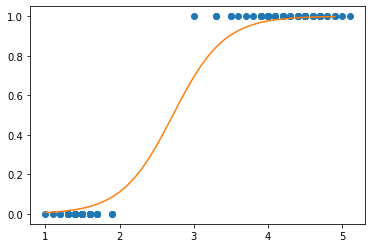

In [ ]:
fig, ax = plt.subplots()
ax.plot(X[:100,2], y[0:100], "o")

clf = LogisticRegression().fit(X[:100,2].reshape(-1, 1), y[:100])
print(clf.coef_)
print(clf.intercept_)


X2 = np.arange(1,5, 0.1)
y2 = sigmoid(clf.intercept_, clf.coef_, X2)
# print(y2)
ax.plot(X2, y2[0,:])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>